### 5. Numerical Integration: Finite Difference

Author: Vignesh Sathyaseelan (vsathyas@purdue.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Second Order Constat Coefficient Problem

$$ \frac{d^{2}y}{dx^{2}} - 2\frac{dy}{dx} + y = 0; y(0) = 0; y(1) = 1 $$

$$ Analytical \  solution: y = x e^{x-1} $$

In [2]:
def gauss_elim(A,b):
    n = len(A) 
    
    #Elimination 
    for i in range(n-1): 
        for j in range(i+1,n):
            if A[j,j]:
                factor = A[j,i]/A[i,i]
            else:
                continue
            for k in range(n):               
                A[j,k] = A[j,k] - (factor * A[i,k])

            b[j] = b[j] - (factor * b[i])

    #Back substitution
    x=np.zeros(n) #initialze solution vector 

    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*A[i,j]
        x[i] = tmp/A[i,i]

    return A,x

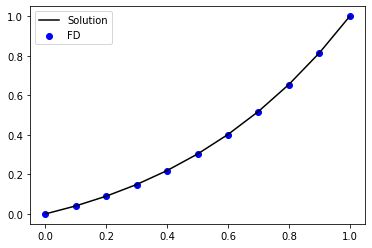

In [3]:
a,b,n = 0,1,10    #Number of grid points to evaluate, Initial and final condition

h = (b-a)/n
x = np.arange(a,b+0.001,h)

#Generate A matrix
A = np.zeros([n+1,n+1])
A[0,0] = 1
A[n,n] = 1
for i in range(1,n):
    A[i,i-1] = 1 + h
    A[i,i] = h**2 - 2
    A[i,i+1] = 1 - h

#Generate Solution Vector
b = np.zeros(n+1)
b[0] = 0
b[-1] = 1

#Solve the system of equations
_,y  = gauss_elim(A,b) 

#Plot Solution
plt.figure()
plt.scatter(x,y,label='FD',color='blue')
g = lambda x : x*np.exp(x-1) #Analytical Solution
plt.plot(x,g(x),color='black',label = 'Solution')
plt.legend()